OBJECTIVE: In this project, I am conducting my own data analysis on a readily available datasetby asking questions and answering them using only Pandas and NumPy, thereby demonstrating the skill to conduct analysis using python programming. I will be using Matplotlib for the plots in this project. This project does not implement any machine learning techniques and hence the results are tentative only.

## STEP 1: CHOOSE THE DATASET

I will be using the Titanic data, obtained from https://www.kaggle.com/c/titanic/data, to perform analysis in this project. This dataset contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic.

Details on the structure of the dataset:

#### VARIABLE DESCRIPTIONS:
```
Survival        Survival
                (0 = No; 1 = Yes)

Pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)

Name            Name

Sex             Sex

Age             Age

SibSp           Number of Siblings/Spouses Aboard

Parch           Number of Parents/Children Aboard

ticket          Ticket Number

fare            Passenger Fare

cabin           Cabin

embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)
```
#### SPECIAL NOTES:

pclass is a proxy for socio-economic status (SES)

1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5


With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic

Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)

Parent:   Mother or Father of Passenger Aboard Titanic

Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.

## STEP 2: PRE-PROCESS THE DATASET
### Load the dataset

In [127]:
import unicodecsv

with open('titanic-data.csv', 'rb') as f:
    titanic_data = list(unicodecsv.DictReader(f))

### Fix data format

In [73]:
# Takes a string which is either an empty string or represents an integer and returns an int or None
def parse_int(i):
    if i=='':
        return None
    else:
        return int(i)

# Takes a string which is either an empty string or represents an float and returns an float or None
def parse_float(i):
    if i=='' or i== None:
        return None
    else:
        return float(i)
    
# Clean up the data types in titanic_data to represent data as integer or float to make it useful

for passenger in titanic_data:
    passenger['PassengerId']= parse_int(passenger['PassengerId'])
    passenger['Survived']= parse_int(passenger['Survived'])
    passenger['Pclass']= parse_int(passenger['Pclass'])
    passenger['Age']= parse_float(passenger['Age'])
    passenger['SibSp']= parse_int(passenger['SibSp'])
    passenger['Parch']= parse_int(passenger['Parch'])
    passenger['Fare']= parse_float(passenger['Fare'])

# STEP 3: ANALYSE THE DATA OVER EACH PARAMETER

So now, I have the data. What can I do with this data now? 
Well, looking at the parameters, I can ask the following questions:
- What is the average age of the survived passengers as oppsed to the ones that did not survive?
- How many of the survivers travelled with siblings, spouse, parents or children?
- Did the class the passenger travelled in have an effect on their survival?
- Did the embarkation point have an effect on their survival?
- Did the cabin the passenger travelled in have an effect on their survival?


### Split the dataset to represent 'survived' vs 'not survived' passengers

In [74]:
survived_passengers = []
not_survived_passengers = []

# Splitting the dataset into two sub-datasets representing passengers who survived 
# against those who did not survive

for passenger in titanic_data:
    if passenger['Survived'] == 1:
        survived_passengers.append(passenger)
    else:
        not_survived_passengers.append(passenger)
        
print (len(survived_passengers))
print (len(not_survived_passengers))

342
549


### Average Age

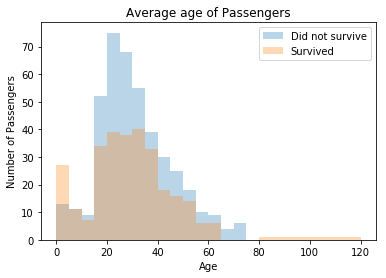

       SURVIVED: Mean:  28.3436896552 | Standard Deviation:  14.9251522203
DID NOT SURVIVE: Mean:  30.6261792453 | Standard Deviation:  14.1553876178


In [76]:
import numpy as np
import matplotlib.pyplot as plt

def create_hist(data, data2, title, xlabel, ylabel, num_of_bins):
    plt.hist([data2], bins=num_of_bins, alpha=0.3, label = "Did not survive")
    plt.hist([data], bins=num_of_bins, alpha=0.3, label = "Survived")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(loc='upper right')
    plt.show()
    
def avg_age_helper(passengers):
    pass_list = []
    for passenger in passengers:
        if passenger.get('Age') != None:
            pass_list.append(passenger.get('Age'))
    
    return pass_list

def avg_age(survived_passengers, not_survived_passengers):
    survived_pass = []
    not_survived_pass = []
    
    create_hist(avg_age_helper(survived_passengers),avg_age_helper(not_survived_passengers),"Average age of Passengers", 'Age', 'Number of Passengers', [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,120])
    print ("       SURVIVED: Mean: ",np.mean(avg_age_helper(survived_passengers)), "| Standard Deviation: ", np.std(avg_age_helper(survived_passengers)))
    
    #create_hist(avg_age_helper(not_survived_passengers),"Age of Passengers who did not survive", 'Age', 'Number of Passengers', [0,10,20,30,40,50,60,70,80,120])
    print ("DID NOT SURVIVE: Mean: ",np.mean(avg_age_helper(not_survived_passengers)), "| Standard Deviation: ", np.std(avg_age_helper(not_survived_passengers)))

avg_age(survived_passengers, not_survived_passengers)

### Observation:
- Infants (0-5 years old) and old people (>80 years) survived more
- Since the average age of people who survived as opposed to those who did not is about the same, age alone might not have been a significant contributor for a person's survival.

### Effect of Gender

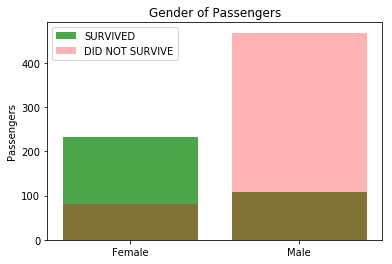

Female: Survived:  233 
Male: Survived:  109 
Female: Did not survive:  81 
Male: Did not survive:  468


In [107]:
def create_barplot(data1, data2, data3, data4, title, xlabel, ylabel, num_of_bins):
    
    objects = ('Female', 'Male')
    x_pos = np.arange(len(objects))
    y_value1 = [data1, data2]
    y_value2 = [data3, data4]
 
    plt.bar(x_pos, y_value1, alpha=0.7, color = 'g', label = 'SURVIVED')
    plt.bar(x_pos, y_value2, alpha=0.3, color = 'r', label = 'DID NOT SURVIVE')
    plt.xticks(x_pos, objects)
    plt.ylabel('Passengers')
    plt.title('Gender of Passengers')
    plt.legend(loc='upper left')
    plt.show()
    
def avg_gender_helper(passengers):
    male = 0
    female = 0
    for passenger in passengers:
        if passenger.get('Sex') == 'male':
            male += 1
        elif passenger.get('Sex') == 'female':
            female += 1
    return female, male

def avg_gender(survived_passengers, not_survived_passengers):
    survived_pass_female, survived_pass_male = avg_gender_helper(survived_passengers)
    not_survived_pass_female, not_survived_pass_male = avg_gender_helper(not_survived_passengers)
    
    create_barplot(survived_pass_female, survived_pass_male, not_survived_pass_female, not_survived_pass_male,\
                "Passenger's Gender", 'Female/Male', 'Number of Passengers', 2)
    print ("Female: Survived: ", survived_pass_female, "\nMale: Survived: ",survived_pass_male, "\nFemale: Did not survive: ", not_survived_pass_female, "\nMale: Did not survive: ", not_survived_pass_male)
     
avg_gender(survived_passengers, not_survived_passengers)

### Observation:
- It can be seen that most females survived and very few males survived

### How many travelled with siblings/spouse

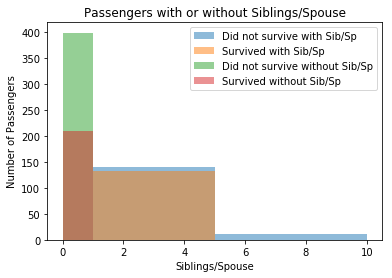

Did not survive with Sib/Sp:  151 
Survived with Sib/Sp:  132 
Did not survive without Sib/Sp:  398 
Survived without Sib/Sp:  210


In [109]:
def create_hist(data, data2, data3, data4, title, xlabel, ylabel, num_of_bins):
    plt.hist([data2], bins=num_of_bins, alpha=0.5, label = "Did not survive with Sib/Sp")
    plt.hist([data], bins=num_of_bins, alpha=0.5, label = "Survived with Sib/Sp")
    plt.hist([data4], bins=num_of_bins, alpha=0.5, label = "Did not survive without Sib/Sp")
    plt.hist([data3], bins=num_of_bins, alpha=0.5, label = "Survived without Sib/Sp")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(loc='upper right')
    plt.show()
    
def is_sibsp_helper(passengers):
    pass_list = []
    pass_list2 = []
    for passenger in passengers:
        if passenger.get('SibSp') >=1:
            pass_list.append(passenger.get('SibSp'))
        else:
            pass_list2.append(passenger.get('SibSp'))
    #return pass_list
    return pass_list, pass_list2

def is_sibsp(survived_passengers, not_survived_passengers):
    survived_pass_with_sibsp, survived_pass_without_sibsp = is_sibsp_helper(survived_passengers)
    not_survived_pass_with_sibsp, not_survived_pass_without_sibsp = is_sibsp_helper(not_survived_passengers)
    
    create_hist(survived_pass_with_sibsp, not_survived_pass_with_sibsp,survived_pass_without_sibsp, \
                not_survived_pass_without_sibsp,"Passengers with or without Siblings/Spouse",\
                'Siblings/Spouse', 'Number of Passengers', [0,1,5,10])
    print ("Did not survive with Sib/Sp: ", len(not_survived_pass_with_sibsp), "\nSurvived with Sib/Sp: ",\
           len(survived_pass_with_sibsp), "\nDid not survive without Sib/Sp: ",\
           len(not_survived_pass_without_sibsp), "\nSurvived without Sib/Sp: ", len(survived_pass_without_sibsp))
    
is_sibsp(survived_passengers, not_survived_passengers)

### Observation:
- People without Siblings or Spouse did not suurvive more often as compared to those who had
- People with more than 5 Siblings + Spouse, more likely did not survive
- However, about the same number of people with 1-5 Siblings & Spouse survived and died

### How many travelled with parents/children

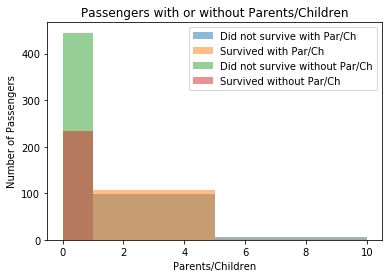

Did not survive with Par/Ch:  104 
Survived with Par/Ch:  109 
Did not survive without Par/Ch:  445 
Survived without Par/Ch:  233


In [105]:
def create_hist(data, data2, data3, data4, title, xlabel, ylabel, num_of_bins):
    plt.hist([data2], bins=num_of_bins, alpha=0.5, label = "Did not survive with Par/Ch")
    plt.hist([data], bins=num_of_bins, alpha=0.5, label = "Survived with Par/Ch")
    plt.hist([data4], bins=num_of_bins, alpha=0.5, label = "Did not survive without Par/Ch")
    plt.hist([data3], bins=num_of_bins, alpha=0.5, label = "Survived without Par/Ch")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(loc='upper right')
    plt.show()
    
def is_parch_helper(passengers):
    pass_list = []
    pass_list2 = []
    for passenger in passengers:
        if passenger.get('Parch') >=1:
            pass_list.append(passenger.get('Parch'))
        else:
            pass_list2.append(passenger.get('Parch'))
    #return pass_list
    return pass_list, pass_list2

def is_parch(survived_passengers, not_survived_passengers):
    survived_pass_with_parch, survived_pass_without_parch = is_parch_helper(survived_passengers)
    not_survived_pass_with_parch, not_survived_pass_without_parch = is_parch_helper(not_survived_passengers)
    
    create_hist(survived_pass_with_parch, not_survived_pass_with_parch, survived_pass_without_parch, \
                not_survived_pass_without_parch, "Passengers with or without Parents/Children",\
                'Parents/Children', 'Number of Passengers', [0,1,5,10])
    print ("Did not survive with Par/Ch: ", len(not_survived_pass_with_parch), "\nSurvived with Par/Ch: ",\
           len(survived_pass_with_parch), "\nDid not survive without Par/Ch: ", len(not_survived_pass_without_parch), "\nSurvived without Par/Ch: ", len(survived_pass_without_parch))
    
is_parch(survived_passengers, not_survived_passengers)

### Observation:
- People without Parents/Children did not suurvive more often as compared to those who had
- People with more than 5 Parents + Children, more likely did not survive
- However, about the same number of people with 1-5 Parents + Children survived and died

### Effect of Socio-Economic class

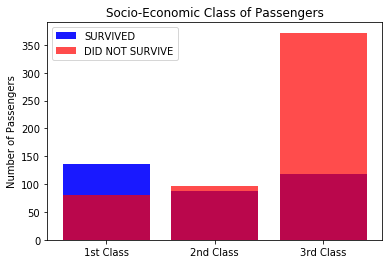

In [123]:
def create_barplot(data_list1, data_list2, title, xlabel, ylabel):
    
    objects = ('1st Class', '2nd Class', '3rd Class')
    x_pos = np.arange(len(objects))
    y_value1 = data_list1
    y_value2 = data_list2
 
    plt.bar(x_pos, y_value1, alpha=0.9, color = 'b', label = 'SURVIVED')
    plt.bar(x_pos, y_value2, alpha=0.7, color = 'r', label = 'DID NOT SURVIVE')
    plt.xticks(x_pos, objects)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(loc='upper left')
    plt.show()

def avg_pclass_helper(passengers):
    pass_class = [0,0,0]
    for passenger in passengers:
        if passenger.get('Pclass') == 1:
            pass_class[0] += 1
        elif passenger.get('Pclass') == 2:
            pass_class[1] += 1
        elif passenger.get('Pclass') == 3:
            pass_class[2] += 1
    return pass_class
    
def avg_pclass(survived_passengers, not_survived_passengers):
    survived_data_list = avg_pclass_helper(survived_passengers)
    not_survived_data_list = avg_pclass_helper(not_survived_passengers)
    
    create_barplot(survived_data_list, not_survived_data_list,'Socio-Economic Class of Passengers','Parents/Children', 'Number of Passengers')


avg_pclass(survived_passengers, not_survived_passengers)

### Effect of embarkation point

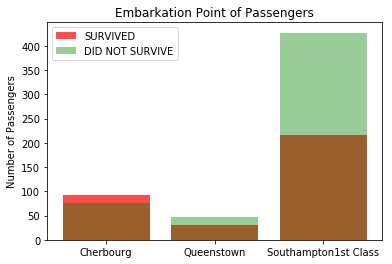

In [135]:
def create_barplot(data_list1, data_list2, title, xlabel, ylabel):
    
    objects = ('Cherbourg', 'Queenstown', 'Southampton1st Class')
    x_pos = np.arange(len(objects))
    y_value1 = data_list1
    y_value2 = data_list2
 
    plt.bar(x_pos, y_value1, alpha=0.7, color = 'r', label = 'SURVIVED')
    plt.bar(x_pos, y_value2, alpha=0.4, color = 'g', label = 'DID NOT SURVIVE')
    plt.xticks(x_pos, objects)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(loc='upper left')
    plt.show()

def avg_embarked_helper(passengers):
    pass_embarkation = [0,0,0]
    for passenger in passengers:
        if passenger.get('Embarked') == 'C':
            pass_embarkation[0] += 1
        elif passenger.get('Embarked') == 'Q':
            pass_embarkation[1] += 1
        elif passenger.get('Embarked') == 'S':
            pass_embarkation[2] += 1
    return pass_embarkation
    
def avg_embarked(survived_passengers, not_survived_passengers):
    survived_data_list = avg_embarked_helper(survived_passengers)
    not_survived_data_list = avg_embarked_helper(not_survived_passengers)
    
    create_barplot(survived_data_list, not_survived_data_list,'Embarkation Point of Passengers','Embarkation point', 'Number of Passengers')


avg_embarked(survived_passengers, not_survived_passengers)

### Observation:
- Most people who boarded the ship from Cherbourg seemed to have survived
- Several people who boarded from Southampton did not survive. However, this can be a little misleading. As according to me, this does not have much to do with the point of Embarkation as the number of passengers who survived at this point is much more than the others. 

## STEP 4: CONCLUSION

From the above tests, we see that mostly female, infants, older people (>80 years) and 1st class paseengers survived

In [136]:
def create_barplot(data_list1, data_list2, title, xlabel, ylabel):
    
    objects = ('1st Class', '2nd Class', '3rd Class')
    x_pos = np.arange(len(objects))
    y_value1 = data_list1
    y_value2 = data_list2
 
    plt.bar(x_pos, y_value1, alpha=0.9, color = 'b', label = 'SURVIVED')
    plt.bar(x_pos, y_value2, alpha=0.7, color = 'r', label = 'DID NOT SURVIVE')
    plt.xticks(x_pos, objects)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(loc='upper left')
    plt.show()

def avg_pclass_helper(passengers):
    pass_class = [0,0,0]
    for passenger in passengers:
        if passenger.get('Pclass') == 1:
            pass_class[0] += 1
        elif passenger.get('Pclass') == 2:
            pass_class[1] += 1
        elif passenger.get('Pclass') == 3:
            pass_class[2] += 1
    return pass_class
    
def avg_pclass(survived_passengers, not_survived_passengers):
    survived_data_list = avg_pclass_helper(survived_passengers)
    not_survived_data_list = avg_pclass_helper(not_survived_passengers)
    
    create_barplot(survived_data_list, not_survived_data_list,'Socio-Economic Class of Passengers','Parents/Children', 'Number of Passengers')


#avg_pclass(survived_passengers, not_survived_passengers)